In [3]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

In [ ]:
!mkdir data
!tar -xf ./inno_stats.tar.gz -C ./data

!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_groups.csv  10_groups.csv  11_groups.csv  product_groups.csv


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [3]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [15]:
bad_ids = pd.read_excel('bad_ids.xlsx', index_col=0)

print(bad_ids.head())

bad_ids = bad_ids['id_card']

   id_card
0   806096
1  1438102
2    72344
3   427981
4  1528414


In [16]:
group_9_new = g_9[~(g_9['id_card'].isin(bad_ids))]

group_9_new.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [17]:
from scipy.stats import ttest_ind

avg_sum = group_9_new.groupby('id_doc')['sum'].mean().values
avg_dis = group_9_new.groupby('id_doc')['is_green'].count().values

ttest_ind(avg_dis, avg_sum)

Ttest_indResult(statistic=-3678.842357621653, pvalue=0.0)

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [14]:
import matplotlib.pyplot as plt

group_9_new.date = pd.to_datetime(group_9_new.date, format="%Y/%m/%d")

days = group_9_new.groupby(group_9_new.date.dt.day)['id_doc'].count()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


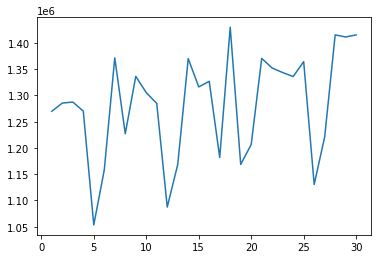

In [15]:
plt.plot(days)

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

##Frequent buyers 





(array([6.171742e+06, 6.463800e+05, 7.310700e+04, 1.077500e+04,
        2.236000e+03, 4.470000e+02, 9.300000e+01, 3.500000e+01,
        6.000000e+00, 4.000000e+00]),
 array([  1. ,  11.7,  22.4,  33.1,  43.8,  54.5,  65.2,  75.9,  86.6,
         97.3, 108. ]),
 <a list of 10 Patch objects>)

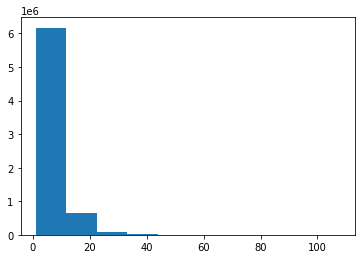

In [8]:
freq_b = group_9_new.groupby('id_doc')['id_doc'].count()

plt.hist(freq_b)

##Average purchase sum 

(array([759543., 231071., 120330.,  72019.,  45694.,  30265.,  20427.,
         14842.,  10694.,   7545.]),
 array([    0.   ,  1999.941,  3999.882,  5999.823,  7999.764,  9999.705,
        11999.646, 13999.587, 15999.528, 17999.469, 19999.41 ]),
 <a list of 10 Patch objects>)

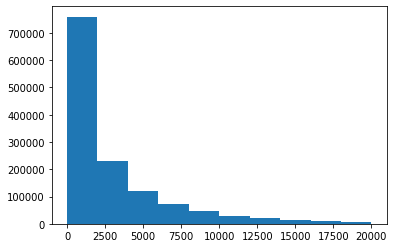

In [18]:
sum_avg = group_9_new.groupby('id_card')['sum'].sum()

plt.hist(sum_avg[sum_avg<20000])

##Usual cart 

In [ ]:
cart_usual = group_9_new.groupby('id_group')['id_card'].unique().apply(len)

plt.hist(cart_usual)

#out of RAM in collab